# Example output from stroke outcome model

In this notebook we provide an example of the output from the stroke outcome model assuming IVT is delivered at 90 mins and MT is delieverd at 120 mins after stroke onset.

The model provides a sample distribution of mRS scores for 1,000 patients.

## Load packages and data file

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from outcome_utilities.clinical_outcome import Clinical_outcome

import warnings
warnings.filterwarnings("ignore")

# Load mRS distributions
mrs_dists = pd.read_csv(
    './outcome_utilities/mrs_dist_probs_cumsum.csv', index_col='Stroke type')

## Set up outcome model and get output

In [2]:
# Set up outcome model
outcome_model = Clinical_outcome(mrs_dists, patients=1000)

# Get outputs
time_to_ivt = 90
time_to_mt = 120
outcomes = outcome_model.calculate_outcomes(time_to_ivt, time_to_mt)

## Show raw model output

The model output is a dictionary of resuls.

In [3]:
outcomes

{'lvo_untreated_probs': array([0.06 , 0.073, 0.137, 0.158, 0.254, 0.129, 0.189]),
 'nlvo_untreated_probs': array([0.206, 0.286, 0.101, 0.13 , 0.14 , 0.058, 0.079]),
 'lvo_ivt_probs': array([0.101, 0.084, 0.126, 0.156, 0.226, 0.112, 0.195]),
 'lvo_mt_probs': array([0.194, 0.136, 0.145, 0.142, 0.187, 0.076, 0.12 ]),
 'nlvo_ivt_probs': array([0.398, 0.205, 0.112, 0.111, 0.09 , 0.029, 0.055]),
 'lvo_untreated_mean_utility': 0.33701000000000003,
 'nlvo_untreated_mean_utility': 0.6147199999999999,
 'lvo_ivt_mean_utility': 0.37484999999999996,
 'lvo_mt_mean_utility': 0.51622,
 'nlvo_ivt_mean_utility': 0.72288,
 'lvo_ivt_added_utility': 0.03783999999999993,
 'lvo_mt_added_utility': 0.17920999999999998,
 'nlvo_ivt_added_utility': 0.10816000000000003,
 'lvo_untreated_cum_probs': array([0.06 , 0.133, 0.27 , 0.428, 0.682, 0.811, 1.   ]),
 'nlvo_untreated_cum_probs': array([0.206, 0.492, 0.593, 0.723, 0.863, 0.921, 1.   ]),
 'lvo_ivt_cum_probs': array([0.101, 0.185, 0.311, 0.467, 0.693, 0.805, 1.  

## Plot mRS distributions

In [4]:
plt.style.use('seaborn-colorblind')
def draw_horizontal_bar(dist,label=' '):
    """
    Draw a stacked horizontal bar chart of the values in 'dist'.
    
    dist  - list or np.array. The probability distribution 
            (non-cumulative).
    label - string. The name printed next to these stacked bars.
    """
    fig = plt.figure(figsize=(8,2))
    ax = fig.add_subplot()
    ax.set_frame_on(False)
    
    colour_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
    # The first bar will start at this point on the x-axis:
    left = 0
    for i in range(len(dist)):
        # Draw a bar starting from 'left', the end of the previous bar,
        # with a width equal to the probability of this mRS:
        ax.barh(' ', width=dist[i], left=left, height=0.5, 
                 label=f'{i}', edgecolor='k', color=colour_list[i%6])
        # Update 'left' with the width of the current bar so that the 
        # next bar drawn will start in the correct place.    
        left += dist[i]
    ax.set_xlabel('Probability')
    ax.set_title(label)
    ax.legend(loc='center',ncol=7, title='mRS', 
               bbox_to_anchor=[0.5,0.0,0.0,-1.20])   # Legend below axis.

Plot mRS distribution for untreated LVO.

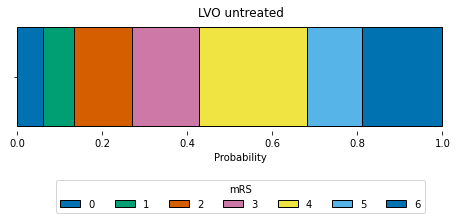

In [5]:
draw_horizontal_bar(outcomes['lvo_untreated_probs'], 'LVO untreated')

Plot mRS distribution for LVO treated with IVT.

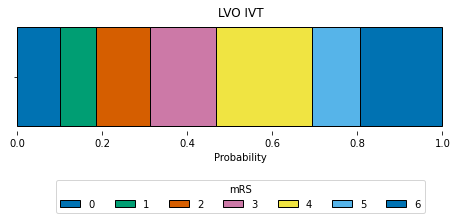

In [6]:
draw_horizontal_bar(outcomes['lvo_ivt_probs'], 'LVO IVT')

Plot mRS distribution for LVO treated with MT.

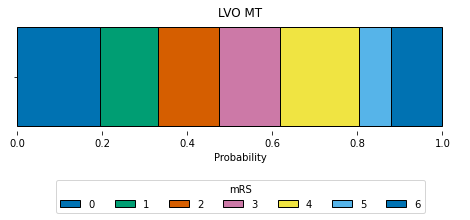

In [7]:
draw_horizontal_bar(outcomes['lvo_mt_probs'], 'LVO MT')

Plot mRS distribution for untreated LVO.

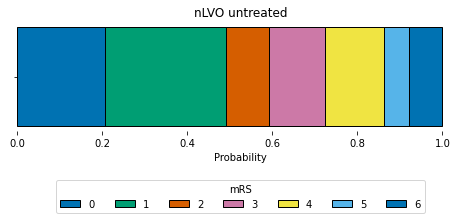

In [8]:
draw_horizontal_bar(outcomes['nlvo_untreated_probs'], 'nLVO untreated')

Plot mRS distribution for nLVO treated with IVT.

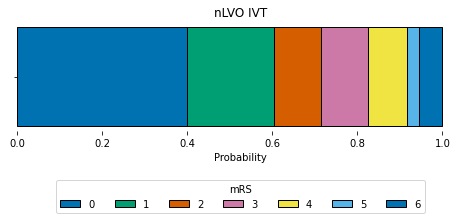

In [9]:
draw_horizontal_bar(outcomes['nlvo_ivt_probs'], 'nLVO IVT')

## Plot changes in mRS proportions with treatment

In [10]:
def plot_shift(dist, label=' '):
    x=np.arange(7)
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot()
    ax.bar(x, dist)
    ax.hlines(0, -0.5, 6.5, color='k', linewidth=1)
    ax.set_xlabel('mRS')
    ax.set_ylabel('Change in probability')
    ax.set_title(label)
    plt.show()

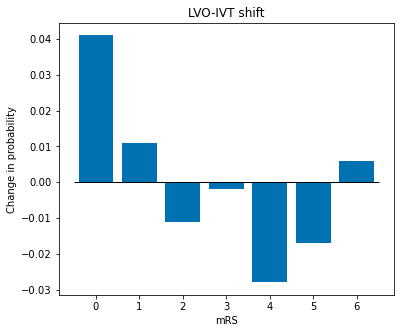

In [11]:
plot_shift(outcomes['lvo_ivt_shift'], 'LVO-IVT shift')

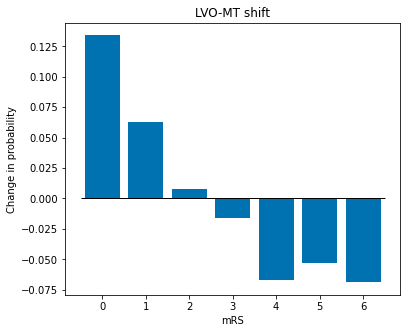

In [12]:
plot_shift(outcomes['lvo_mt_shift'], 'LVO-MT shift')

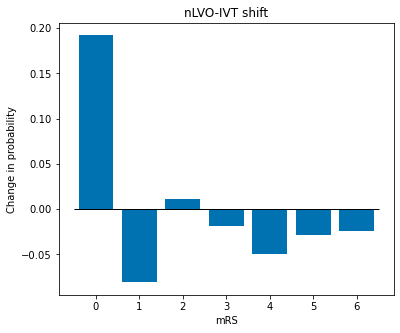

In [13]:
plot_shift(outcomes['nlvo_ivt_shift'], 'nLVO-IVT shift')

## Other stats

### Mean mRS

In [14]:
print('Mean mRS')
print('--------')
print('LVO untreated:', outcomes['lvo_untreated_mean_mRS'])
print('LVO IVT:', outcomes['lvo_ivt_mean_mRS'])
print('LVO MT:', outcomes['lvo_mt_mean_mRS'])
print('nLVO untreated:', outcomes['nlvo_untreated_mean_mRS'])
print('nLVO IVT:', outcomes['nlvo_ivt_mean_mRS'])

Mean mRS
--------
LVO untreated: 3.616
LVO IVT: 3.438
LVO MT: 2.7
nLVO untreated: 2.202
nLVO IVT: 1.597


### Mean shift in mRS

In [15]:
print('Mean mRS shift')
print('--------------')
print('LVO IVT:', outcomes['lvo_ivt_mean_shift'])
print('LVO MT:', outcomes['lvo_mt_mean_shift'])
print('nLVO IVT:', outcomes['nlvo_ivt_mean_shift'])

Mean mRS shift
--------------
LVO IVT: -0.178
LVO MT: -0.994
nLVO IVT: -0.605


### The proportion of patients with improved mRS

In [16]:
print('Proportion improved')
print('-------------------')
print('LVO IVT:', outcomes['lvo_ivt_improved'])
print('LVO MT:', outcomes['lvo_mt_improved'])
print('nLVO IVT:', outcomes['nlvo_ivt_improved'])

Proportion improved
-------------------
LVO IVT: 0.184
LVO MT: 0.81
nLVO IVT: 0.595


### Utility-weighted outcomes

In addition to mRS we may calculate utility-weighted mRS.

mRS Utility scores are based on a pooled Analysis of 20 000+ Patients. 
From  Wang X, Moullaali TJ, Li Q, Berge E, Robinson TG, Lindley R, et al.
Utility-Weighted Modified Rankin Scale Scores for the Assessment of Stroke
Outcome. Stroke. 2020 Aug 1;51(8):2411-7.

| mRS Score | 0    | 1    | 2    | 3    | 4    | 5     | 6    |
|-----------|------|------|------|------|------|-------|------|
| Utility   | 0.97 | 0.88 | 0.74 | 0.55 | 0.20 | -0.19 | 0.00 |

In [17]:
x = outcomes['lvo_untreated_mean_utility']
print(f'LVO untreated utility: {x:0.3f}')

x1 = outcomes['lvo_ivt_mean_utility']
x2 = outcomes['lvo_ivt_added_utility']
print(f'LVO IVT utility: {x1:0.3f} (added utility: {x2:0.3f})')

x1 = outcomes['lvo_mt_mean_utility']
x2 = outcomes['lvo_mt_added_utility']
print(f'LVO MT utility: {x1:0.3f} (added utility: {x2:0.3f})')

x = outcomes['nlvo_untreated_mean_utility']
print(f'nLVO untreated utility: {x:0.3f}')

x1 = outcomes['nlvo_ivt_mean_utility']
x2 = outcomes['nlvo_ivt_added_utility']
print(f'nLVO IVT utility: {x1:0.3f} (added utility: {x2:0.3f})')



LVO untreated utility: 0.337
LVO IVT utility: 0.375 (added utility: 0.038)
LVO MT utility: 0.516 (added utility: 0.179)
nLVO untreated utility: 0.615
nLVO IVT utility: 0.723 (added utility: 0.108)
